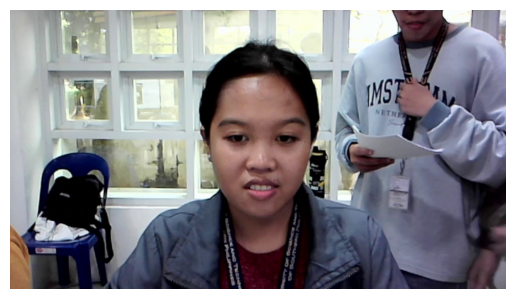

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

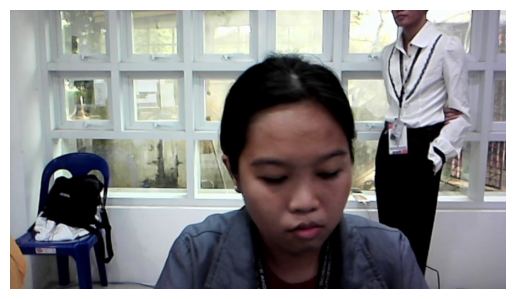

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

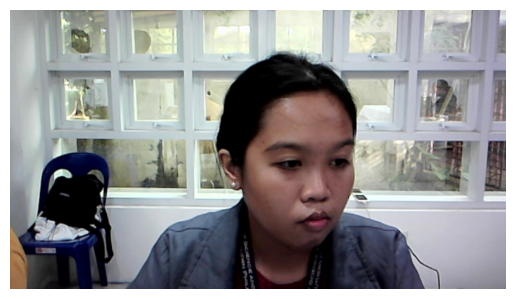

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

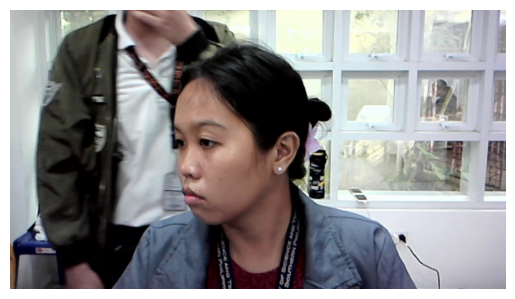

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

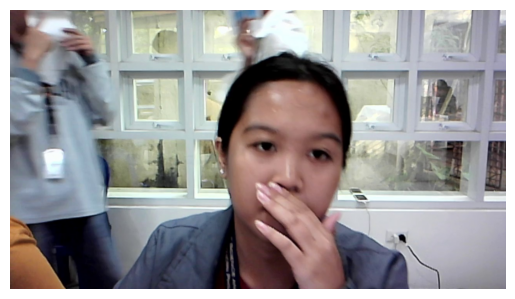

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

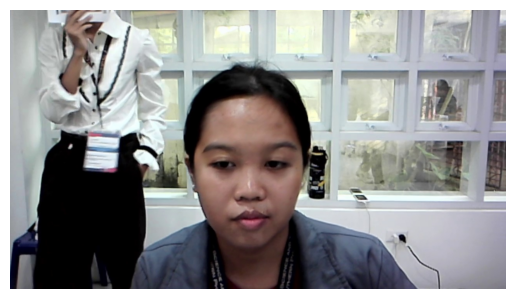

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

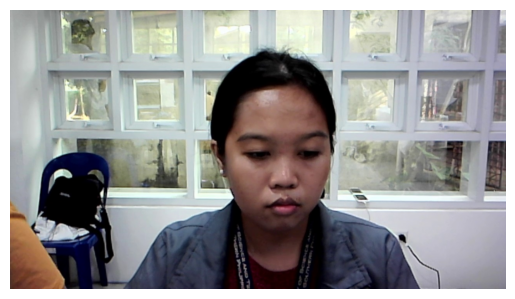

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

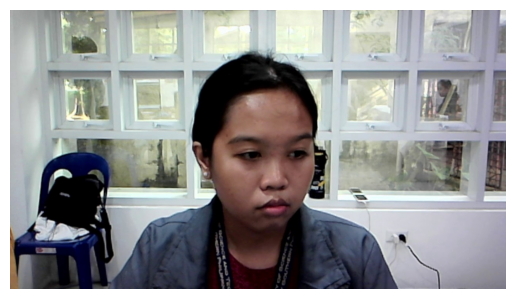

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

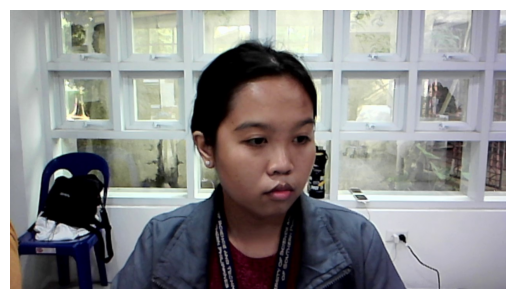

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

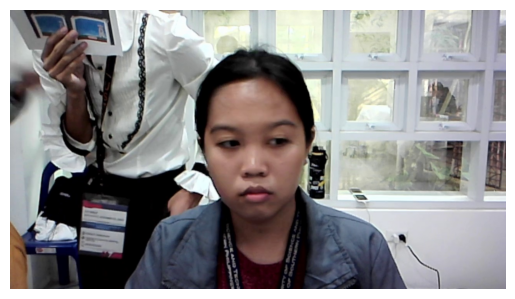

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

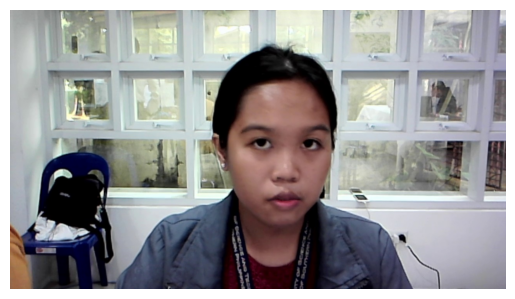

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

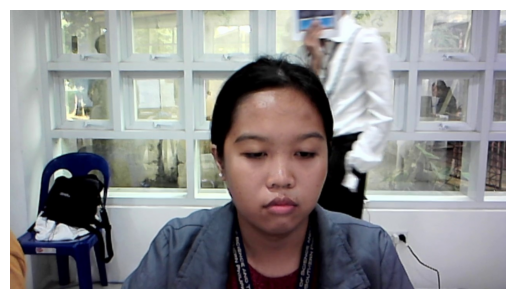

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

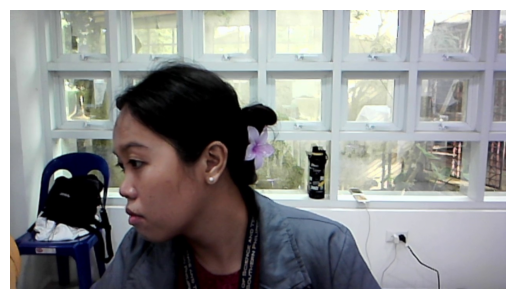

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

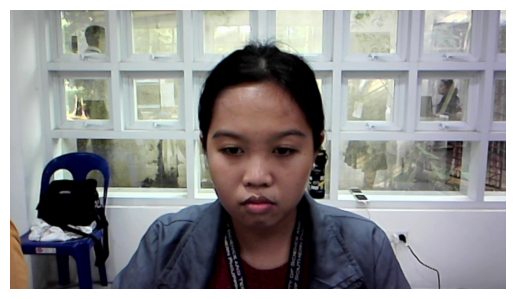

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

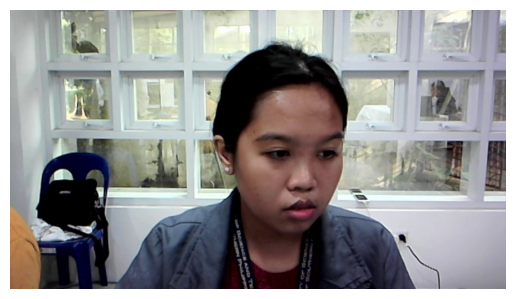

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

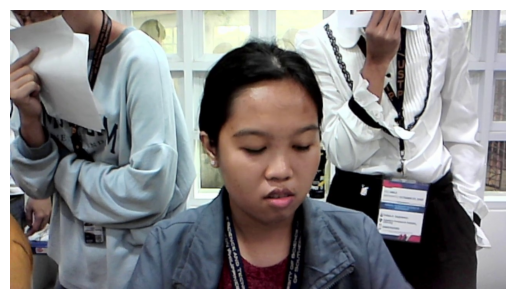

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

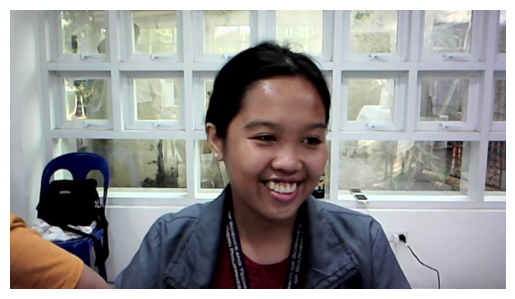

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

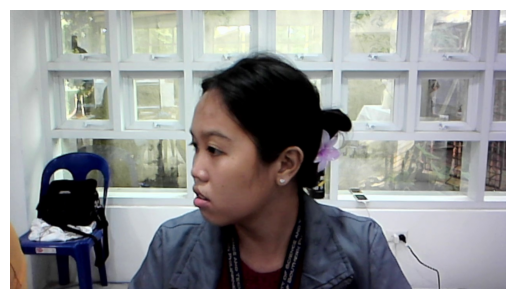

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

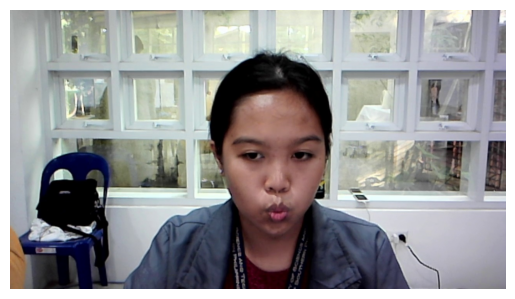

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

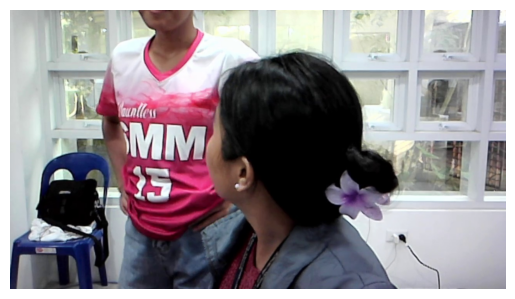

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

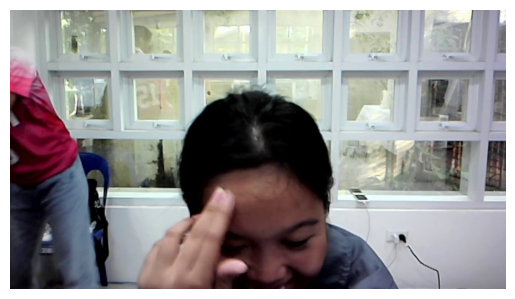

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

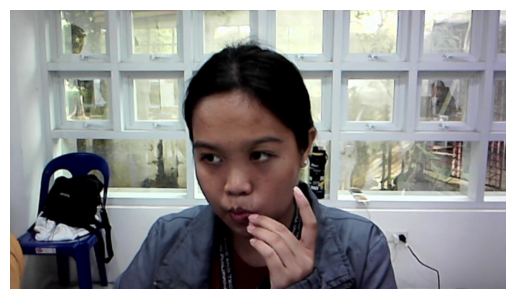

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

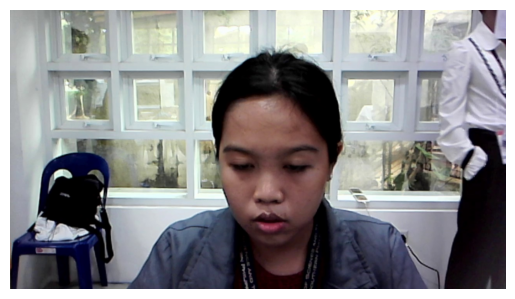

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

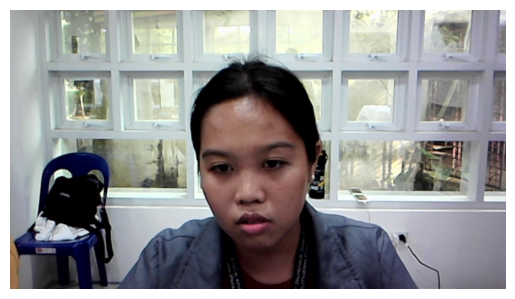

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

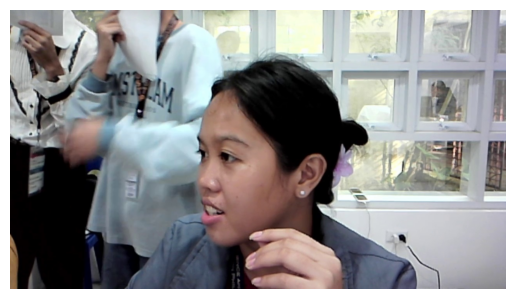

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

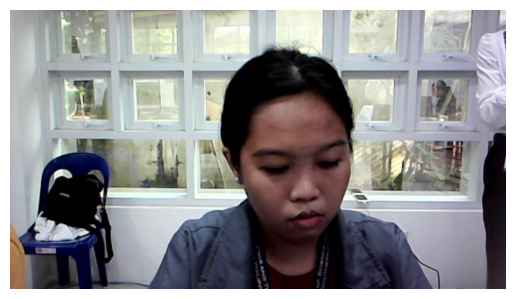

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

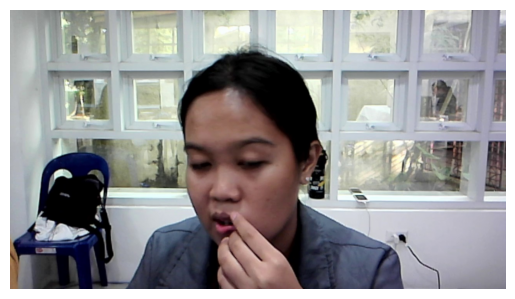

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

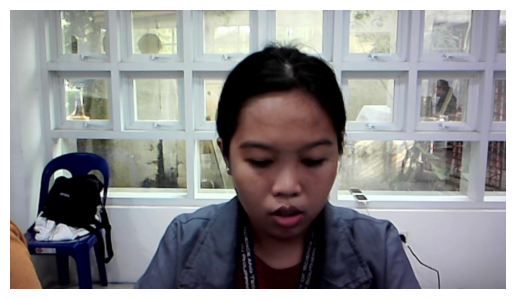

Dropdown(description='Emotion:', options=('Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness'…

In [1]:
import os
import cv2
import shutil
import csv
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Step 1: Define the directory containing the images
captured_frames_dir = 'captured_frames'  # Update this path if necessary

# Step 2: Create directories for each emotion and the undecided category
emotion_dirs = ['data/anger', 'data/disgust', 'data/fear', 'data/happiness', 'data/sadness', 'data/surprise', 'data/neutral', 'data/undecided']
for dir in emotion_dirs:
    if not os.path.exists(dir):
        os.makedirs(dir)

# Step 3: Prepare the CSV file for storing the ground truth
csv_filename = "ground_truth.csv"
fieldnames = ['filename', 'emotion']

# Check if the CSV file already exists, if not create it and write the header
if not os.path.exists(csv_filename):
    with open(csv_filename, mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()

# Step 4: Function to display image and ask for user input via dropdown
def display_and_ask_emotion(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if img is None:
        print(f"Error loading image {image_path}")
        return None

    # Convert the image from BGR (OpenCV format) to RGB (matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis("off")  # Hide axes
    plt.show()

    # Dropdown for emotion selection
    emotion_dropdown = widgets.Dropdown(
        options=['Select Emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral', 'undecided'],
        value='Select Emotion',
        description='Emotion:',
        disabled=False
    )

    display(emotion_dropdown)

    # Wait for the user to select the emotion and click submit
    def on_submit(change):
        selected_emotion = emotion_dropdown.value
        if selected_emotion != 'Select Emotion':
            # Log the result and move the file
            log_ground_truth(image_path, selected_emotion)
            move_image(image_path, selected_emotion)
            emotion_dropdown.close()
        else:
            print("Please select a valid emotion.")
        
    emotion_dropdown.observe(on_submit, names='value')

# Step 5: Function to move the image to the corresponding emotion directory
def move_image(image_path, emotion):
    target_dir = f"data/{emotion}"
    shutil.move(image_path, os.path.join(target_dir, os.path.basename(image_path)))
    print(f"Moved {os.path.basename(image_path)} to {target_dir}")

# Step 6: Function to log the ground truth to a CSV file
def log_ground_truth(image_path, emotion):
    with open(csv_filename, mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerow({'filename': os.path.basename(image_path), 'emotion': emotion})
    print(f"Logged {os.path.basename(image_path)} with emotion: {emotion} to CSV")

# Step 7: Iterate over images in the 'captured_frames' folder
for root, dirs, files in os.walk(captured_frames_dir):
    for filename in files:
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Only process image files
            filepath = os.path.join(root, filename)

            # Ask the user for the emotion for the current image
            display_and_ask_emotion(filepath)
